<a href="https://colab.research.google.com/github/Mariyyah-Alrasheed/Mini_Project_4/blob/main/Week4_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip show tensorflow
!pip show scikit-learn

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, sklearn-pandas, yellowbrick


In [2]:
!pip install keras-tuner

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,BatchNormalization,Dropout,MaxPooling2D,ReLU
import numpy as np
import keras_tuner as kt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images in the range (degrees, 0 to 20)
    width_shift_range=0.2,  # Randomly translate images horizontally
    height_shift_range=0.2,  # Randomly translate images vertically
    shear_range=0.2,  # Randomly shear images
    zoom_range=0.2,  # Randomly zoom images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest',  # Fill pixels in images after transformation
    validation_split=0.2  # Set aside 20% of images for validation
)

In [5]:
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/T5_Mriyyah/Week4_DL/Mini_task_Week_4/Vehicles')

df_train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/T5_Mriyyah/Week4_DL/Mini_task_Week_4/Vehicles',
    target_size=(512, 512),
    class_mode='sparse',
    subset='training',
    seed=123
)

df_validation = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/T5_Mriyyah/Week4_DL/Mini_task_Week_4/Vehicles',
    target_size=(512, 512),
    class_mode='sparse',
    subset='validation',
    seed=123
)

Found 3190 files belonging to 4 classes.
Found 2552 images belonging to 4 classes.
Found 638 images belonging to 4 classes.


In [7]:
class_names = dataset.class_names
print(class_names)

['Auto-Rickshaws', 'Bikes', 'Cars', 'Motorcycles']


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(512, 512, 3)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(len(class_names), activation="softmax")  # Ensure this matches the number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # metrics should be a list
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


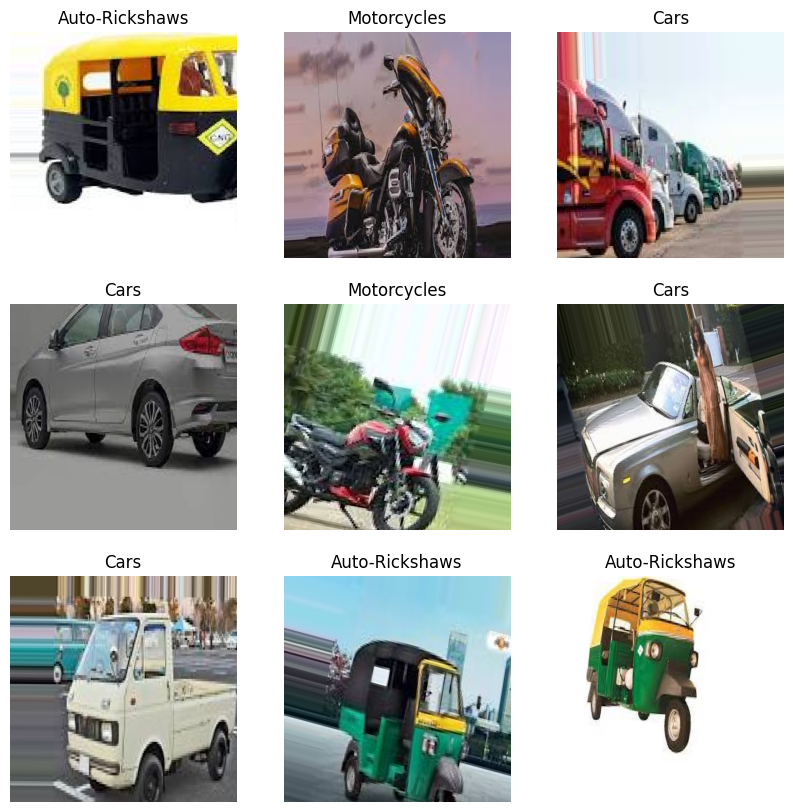

In [17]:
import matplotlib.pyplot as plt

# Assuming class_names is defined from your train_generator
class_names = list(df_train.class_indices.keys())

# Plotting the images
plt.figure(figsize=(10,10))
for images, labels in df_train:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    break  # Only want to plot the first batch of 9 images


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 512, 512, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512, 512, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 512, 512, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 524288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      33,554,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,971,534 (385.18 MB)

 Trainable params: 33,657,028 (128.39 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 67,314,058 (256.78 MB)

In [18]:
history = model.fit(
    df_train,  # Augmented training dataset
    validation_data=df_validation,  # Validation dataset
    epochs=20,  # Number of epochs
    verbose=1  # Verbosity mode
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/80 ━━━━━━━━━━━━━━━━━━━━ 14:07 26s/step - accuracy: 0.2834 - loss: 77.5666

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


80/80 ━━━━━━━━━━━━━━━━━━━━ 2595s 30s/step - accuracy: 0.2936 - loss: 59.5997 - val_accuracy: 0.3370 - val_loss: 3.8321
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.3544 - loss: 2.1393 - val_accuracy: 0.2790 - val_loss: 2.6335
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.3651 - loss: 1.5048 - val_accuracy: 0.2947 - val_loss: 3.3475
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.3558 - loss: 1.6198 - val_accuracy: 0.2884 - val_loss: 1.6539
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.3294 - loss: 1.4963 - val_accuracy: 0.3354 - val_loss: 1.4333
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.3715 - loss: 1.4240 - val_accuracy: 0.4169 - val_loss: 1.2985
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.4428 - loss: 1.2359 - val_accuracy: 0.3166 - val_loss: 1.7048
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.4732 - loss: 1.2337 - val_accuracy: 0.3103 - val_loss:

# Try to improve the accuracy by add more Conv Layer

In [8]:
model_1 = Sequential([
      Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(512,512,3)),
      Conv2D(32,(3,3),activation='relu'),
      Conv2D(32,(3,3),activation='relu'),

      BatchNormalization(),

      MaxPooling2D((2, 2)),
      Dropout(0.2),

      Conv2D(64,(3,3),activation='relu'),
      Conv2D(64,(3,3),activation='relu'),
      Conv2D(64,(3,3),activation='relu'),

      MaxPooling2D((2, 2)),
      Dropout(0.3),

      Conv2D(128,(3,3),activation='relu'),
      Conv2D(128,(3,3),activation='relu'),
      Conv2D(128,(3,3),activation='relu'),

      MaxPooling2D((2, 2)),

      Flatten(),
      Dense(64,activation='relu'),
      Dense(128,activation='relu'),
      Dense(len(class_names), activation="softmax")

  ])
model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 512, 512, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 510, 510, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 508, 508, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 508, 508, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 254, 254, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 254, 254, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 252, 252, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 250, 250, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 248, 248, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 124, 124, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 124, 124, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 118, 118, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 59, 59, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 445568)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │      28,516,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,006,148 (110.65 MB)

 Trainable params: 29,006,084 (110.65 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
model_1.fit(
    df_train,  # Augmented training dataset
    validation_data=df_validation,  # Validation dataset
    epochs=100,  # Number of epochs
    verbose=1  # Verbosity mode
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/80 ━━━━━━━━━━━━━━━━━━━━ 2:20 2s/step - accuracy: 0.2208 - loss: 8.0027

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


80/80 ━━━━━━━━━━━━━━━━━━━━ 412s 4s/step - accuracy: 0.2332 - loss: 4.1336 - val_accuracy: 0.2508 - val_loss: 1.3863
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.2596 - loss: 1.3862 - val_accuracy: 0.2508 - val_loss: 1.3860
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.2829 - loss: 1.3600 - val_accuracy: 0.2665 - val_loss: 1.3750
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.4395 - loss: 1.2165 - val_accuracy: 0.2727 - val_loss: 1.3772
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.4621 - loss: 1.1694 - val_accuracy: 0.5313 - val_loss: 1.0444
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.4952 - loss: 1.1198 - val_accuracy: 0.4420 - val_loss: 1.2331
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.5415 - loss: 1.0371 - val_accuracy: 0.6332 - val_loss: 0.9016
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.5632 - loss: 0.9917 - val_accuracy: 0.5987 - val_l

In [ ]:
model_1.evaluate(df_validation)

In [ ]:
model_1.evaluate(df_train)